In [ ]:
import numpy as np
import random
import math
from numpy import savetxt

tree = []
walkers = []
MAX_grid = 50
MIN_grid = 0
raio = 1
threshold = raio*2 
num_iteracoes = 300


 walkers = cria_lista_caminhos_aleatorios(800)

tree = []\n",
        "walkers = []\n",
        "MAX_grid = 50\n",
        "MIN_grid = 0\n",
        "raio = 1\n",
        "threshold = raio*2 \n",
        "num_iteracoes = 400"
        walkers = cria_lista_caminhos_aleatorios(1000)\
        

In [ ]:
#Variáveis globais
tree = []
walkers = []
MAX_grid = 50
MIN_grid = 0
raio = 1
threshold = raio*2 
num_iteracoes = 300

In [ ]:
def rand_face():
    #escolhe face
    rand = random.randint(1,4)
    
    if rand == 1:
        ponto = {"x":random.randint(MIN_grid,MAX_grid), "y":MAX_grid}
    if rand == 2:
        ponto = {"x":random.randint(MIN_grid,MAX_grid), "y":MIN_grid}
    if rand == 3:
        ponto = {"x":MIN_grid, "y":random.randint(MIN_grid,MAX_grid)}
    if rand == 4:
        ponto = {"x":MAX_grid, "y":random.randint(MIN_grid,MAX_grid)}
    return ponto

In [ ]:
def cria_lista_caminhos_aleatorios(num=10):
    aux = [] 
    for i in range(num):
        ponto = rand_face()
        aux.append(ponto)
    return aux

In [ ]:
def distancia_euclidiana(a,b):
    d = math.sqrt(pow((b["x"] - a["x"]),2)+pow((b["y"] - a["y"]),2))
    return d


In [ ]:
def checa_colisao(tree,walkers):
    remove = []
    for j in range(len(walkers)):
        for i in range(len(tree)):
            d = distancia_euclidiana(tree[i],walkers[j])
            if d < threshold:
                #print("BOOOM!!!!!!")
                #print(tree[i])
                #print(walkers[j])
                #print("\n")
                remove.append(j)
                break
                
    remove.sort(reverse=True)
    
    #print(remove)
    #print(len(walkers))
    
    for i in remove:
        aux = walkers.pop(i)
        tree.append(aux)
        
            
    return tree, walkers
    

In [ ]:
def rand_anda(ponto):
    
    ponto["x"] += random.randint(-2,2)
    while(ponto["x"] > MAX_grid or ponto["x"] < MIN_grid):
        ponto["x"] += random.randint(-2,2)
        
    ponto["y"] += random.randint(-2,2)
    while(ponto["y"] > MAX_grid or ponto["y"] < MIN_grid):
         ponto["y"] += random.randint(-2,2)   
    return ponto


In [ ]:
def dicttoarray(lista):
    linhas = len(lista)
    colunas = 2
    
    matriz = np.zeros([linhas,colunas],dtype = int)
    
    for i in range(linhas):
        for j in range(colunas):
            if j == 0:
                matriz[i][j] = lista[i]["x"]
            if j == 1:
                matriz[i][j] = lista[i]["y"]
    return matriz

In [ ]:
for i_file in range(2):  
    #Insere a starting point
    #ponto = {"x":MAX_grid/2, "y":MAX_grid/2}
    #ponto = {"x":MAX_grid/2, "y":MAX_grid}
    ponto = {"x":MAX_grid/2, "y":MAX_grid/2}
    tree.append(ponto)
        
    #Crio os caminhos aleatorios
    #posso criar mais walkers aleatorios no momento crio 10
    walkers = cria_lista_caminhos_aleatorios(20)
    
    for i in range(num_iteracoes):
    #while(len(tree)<num_iteracoes):
        #limpo tela
        #limpa_tela()
        
        #Verifico colisão, se houve colisão tiro de uma lista e ponho na outra
        tree, walkers = checa_colisao(tree,walkers)
        
        #Os que não foram removidos
        #Atualizo o X,Y e Z dos caminhantes
        for i in range(len(walkers)):
            walkers[i] = rand_anda(walkers[i])
            #print(walkers[i])
        
        #Imprimo bolinhas
        #desenha_bolinhas(tree)
        #desenha_bolinhas(walkers)
       
    #desenha_bolinhas(tree) 
    #desenha_cubos(tree)  
    #desenha_torus(tree) 
    print("Finish")

    tree = []

    matriz = dicttoarray(tree)
    savetxt("lista_2D_{}.txt".format(i_file),matriz,fmt="%d")


Finish
Finish


In [ ]:
matriz = dicttoarray(tree)

In [ ]:
savetxt("lista_2D_{}.txt".format(file_i),matriz,fmt="%d")
file_i += 1

In [ ]:
m = np.loadtxt("lista_2D_{}.txt".format(file_i-1), dtype=int)

# Circulo

In [ ]:
def rotate_z(vector, theta):
    R_z = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta),  0],
        [0,             0,              1]
    ])
    return R_z @ vector

def create_circle(r, B):
    start_v = np.array([r, 0, 0])
    rot_ang = np.pi / B
    base_pos_vs = [rotate_z(start_v, i*rot_ang) for i in range(B)] + [np.array([-r, 0, 0])]
    base_pos_vs = [np.array([x,y]) for x,y,z in base_pos_vs]
    base_neg_vs = [np.array([-x,-y]) for x,y in base_pos_vs][::-1]
    return np.array(base_pos_vs + base_neg_vs)

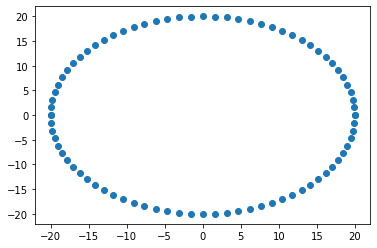

In [ ]:
import matplotlib.pyplot as plt
cir_ps = create_circle(20, 40)
initialize_tree = [{'x':x, 'y':y} for x,y in cir_ps]
plt.scatter(cir_ps.T[0], cir_ps.T[1])

In [ ]:
def walk_init(num=10):
    aux = [] 
    for i in range(num):
        ponto = {"x":0, "y":0}
        aux.append(ponto)
    return aux

In [ ]:
def rand_anda(ponto):
    
    ponto["x"] += random.randint(-2,2)
        
    ponto["y"] += random.randint(-2,2)
  
    return ponto


In [ ]:
#for i_file in range(20):  
#Insere a starting point
#ponto = {"x":MAX_grid/2, "y":MAX_grid/2}
#ponto = {"x":MAX_grid/2, "y":MAX_grid}
#ponto = {"x":MAX_grid/2, "y":MAX_grid/2}
tree = initialize_tree
    
#Crio os caminhos aleatorios
#posso criar mais walkers aleatorios no momento crio 10
walkers = walk_init(300)

for i in range(num_iteracoes):
#while(len(tree)<num_iteracoes):
    #limpo tela
    #limpa_tela()
    
    #Verifico colisão, se houve colisão tiro de uma lista e ponho na outra
    tree, walkers = checa_colisao(tree,walkers)
    
    #Os que não foram removidos
    #Atualizo o X,Y e Z dos caminhantes
    for i in range(len(walkers)):
        walkers[i] = rand_anda(walkers[i])
        #print(walkers[i])
    
    #Imprimo bolinhas
    #desenha_bolinhas(tree)
    #desenha_bolinhas(walkers)
    
#desenha_bolinhas(tree) 
#desenha_cubos(tree)  
#desenha_torus(tree) 
print("Finish")

matriz = dicttoarray(tree)
savetxt("lista_2D_{}.txt".format(i_file),matriz,fmt="%d")


Finish


In [ ]:
matriz = dicttoarray(tree)